# **Анализ данных национального виктимизационного опроса**

# Данный проект посвящен изучению преступности на территории Российской Федерации. Цель работы – выяснить, как влияют социально-демографические характеристики человека на его возможность оказаться жертвой преступления (виктимность).
>##### Данные для анализа собраны Институтом проблем правоприменения (ИПП) при ЕУ СПб и представляют результаты телефонного опроса респондентов не моложе 18 лет на основании простой случайной выборки телефонных номеров. Респонденты опрашивались не зависимо от гражданства, но, по понятным причинам, большинство (98.1%) были гражданами РФ. Вопросы делились на анкетные (пол, возраст, социо-демографический профиль), основной («были ли жертвой преступления») и уточняющие вопросы о преступлениях (где, когда и т.п.). Анкета составлена специальным образом профессионалами, учитывая многие особенности, например специфику русского языка.
# Задачи данного исследования:
*   Ознакомиться с форматом данных, осуществить их предобработку.
*   Сделать анализ данных опроса жителей РФ о преступлениях, жертвами которых они становились.
*   Визуализировать найденные закономерности.
*   Исходя из выявленных зависимостей, построить классификационную модель, определяющую виктимность человека.





### Замечание: для корректного отображения графиков просьба произвести *запуск всех ячеек*

## Структура проекта



---


1.   [***Импорт необходимых библиотек***](#Импорт-необходимых-библиотек)
2.   [***Загрузка и предварительная обработка данных***](#Загрузка-и-предварительная-обработка-данных)
3.   [***Был ли респодент жертвой преступления?***](#Был-ли-респодент-жертвой-преступления?)
4.   [***Анализ влияния полового признака на совершение преступлений и подверженность им***](#Анализ-влияния-полового-признака-на-совершение-преступлений-и-подверженность-им)
5.   [***Был ли найден нападавший?***](#Был-ли-найден-нападавший?)
6.   [***Была ли необходима медицинская помощь?***](#Была-ли-необходима-медицинская-помощь?)
7.   [***Был ли нападавший при исполнении?***](#Был-ли-нападавший-при-исполнении?)
8.   [***Анализ частоты видов преступлений***](#Анализ-частоты-видов-преступлений)
9.   [***Анализ влияния возраста на подверженность преступлениям***](#Анализ-влияния-возраста-на-подверженность-преступлениям)
10.   [***Анализ влияния дохода на подверженность преступлениям***](#Анализ-влияния-дохода-на-подверженность-преступлениям)
11.   [***Анализ скорости реагирования правоохранителей***](#Анализ-скорости-реагирования-правоохранителей)
12.   [***Анализ материального ущерба пострадавших***](#Анализ-материального-ущерба-пострадавших)
13.   [***Анализ зависимости вида преступлений от времени суток***](#Анализ-зависимости-вида-преступлений-от-времени-суток)


---





## Импорт и установка необходимых библиотек

In [399]:
# !pip install catboost
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn
# !pip install tensorflow
# !pip install scipy
# !pip install ipywidgets
# !pip install ipython
# !pip install seaborn

In [400]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [401]:
#Импорт

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import get_file as getfile  # Используется для того, чтобы скачать датасет напрямую
import matplotlib.patches as mpatches
from scipy import stats as st
from copy import copy
import seaborn as sns
import math

## Загрузка и предварительная обработка данных

*После изучения данных и рекомендаций в [технической документации к данным](https://globaldataversecommunityconsortium.github.io/dataverse-previewers/previewers/PDFPreview.html?fileid=3441892&siteUrl=https://dataverse.harvard.edu&datasetid=3382060&datasetversion=5.0&locale=en), было принято решение использовать **только сконструированные переменные**, которые не несут в себе субъективных оценок респондента и являются необходимыми для анализа, изменив переменную:*

*   **offender_is_on_duty** – был ли преступник должностным лицом или при исполнении (категориальная переменная)





**Загрузка файла с серверов Гарварда**

In [402]:
# Загрузка файла с серверов Гарварда
dataset_path = getfile("dataset.csv", "https://dataverse.harvard.edu/api/access/datafile/3676762?format=original&gbrecs=true")

Преобразовываем данные в датафрейм


In [403]:
raw_dataset = pd.read_csv(dataset_path)
df = raw_dataset.copy()
df.head()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,...,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
0,12646573,544,1,57,1,2.0,2.0,NaN,полтора года тому назад,1.0,NaN,1.0,2.0,1.0,8.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,300.0,2.477121,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12658422,1643,1,59,1,4.0,1.0,2.0,открытый грабеж-выхватили сумку с документами ...,2.0,4.0,NaN,1.0,1.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,NaN,0.0,1.0,1.0,1.0,0.0,NaN,80000.0,4.903090,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,8.0,6.0
2,12660336,676,1,35,1,1.0,2.0,NaN,"покупка на авито ,мы отправили деньги ,но нам...",1.0,NaN,14.0,2.0,1.0,12.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,7.0,0.0,0.0,1.0,1.0,1.0,NaN,3000.0,3.477121,1.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12664831,510,1,22,1,1.0,2.0,NaN,украли телефон,2.0,1.0,NaN,2.0,1.0,6.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,7000.0,3.845098,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12666214,1107,1,79,1,3.0,2.0,NaN,"мошенничество,говорят и звонят я твой сын и до...",1.0,NaN,1.0,2.0,1.0,8.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,13.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.000000,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0


***Для последующего анализа разделим данные на две выборки:***

*   Лица, являющиеся жертвами преступлений – ***victims***
*   Лица, не являющиеся жертвами преступлений – ***not_victims***


In [404]:
victims = df[df['resp_is_crime_victim'] == 1]

not_victims = df[df['resp_is_crime_victim'] == 0]

Вид данных после разбиение на 2 выборки:

In [405]:
victims.head()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,...,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
0,12646573,544,1,57,1,2.0,2.0,NaN,полтора года тому назад,1.0,NaN,1.0,2.0,1.0,8.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,300.0,2.477121,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12658422,1643,1,59,1,4.0,1.0,2.0,открытый грабеж-выхватили сумку с документами ...,2.0,4.0,NaN,1.0,1.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,NaN,0.0,1.0,1.0,1.0,0.0,NaN,80000.0,4.903090,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,8.0,6.0
2,12660336,676,1,35,1,1.0,2.0,NaN,"покупка на авито ,мы отправили деньги ,но нам...",1.0,NaN,14.0,2.0,1.0,12.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,7.0,0.0,0.0,1.0,1.0,1.0,NaN,3000.0,3.477121,1.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12664831,510,1,22,1,1.0,2.0,NaN,украли телефон,2.0,1.0,NaN,2.0,1.0,6.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,7000.0,3.845098,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12666214,1107,1,79,1,3.0,2.0,NaN,"мошенничество,говорят и звонят я твой сын и до...",1.0,NaN,1.0,2.0,1.0,8.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,13.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.000000,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0


In [406]:
not_victims.head()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,...,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
100,13260772,247,2,32,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,13260913,91,2,38,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,13260941,259,1,30,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,13260996,105,1,56,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,13261127,245,2,19,2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Изменяем указанную переменную, удаляем исходные переменные, оставляя только сконструированные

In [407]:
# Добавляем переменные
# df['crime_asked_medical_help'] = df['Q28']  -- crime_is_seeking_medical_help
df['offender_is_on_duty'] = df['Q12']

# Удаляем исходные переменные
df.drop(df.loc[:, :'Q65'], inplace=True, axis=1)

Проверяем данные на наличие дубликатов:

In [408]:
not_victims_duplicates = not_victims.loc[not_victims.duplicated()]
victims_duplicates = victims.loc[victims.duplicated()]
print('В выборке лиц, являющихся жертвами преступлений {} дубликатов'.format(len(victims_duplicates)))
print('В выборке лиц, не являющихся жертвами преступлений {} дубликатов'.format(len(not_victims_duplicates)))

В выборке лиц, являющихся жертвами преступлений 0 дубликатов
В выборке лиц, не являющихся жертвами преступлений 0 дубликатов


Удаляем сконструированные переменные, несущие в себе субъективные оценки корреспондента / не используемые в анализе данных

In [409]:
# Список удаляемых сконструированных переменных, несущих в себе субъективные оценки корреспондента / не используемых в анализе
drop_list = ['resp_place_is_city', 'resp_place_population',
         'resp_household_size', 'resp_is_enforcers_familiar',
         'resp_sample_group', 'resp_ses_is_pensioner', 
         'resp_ses_is_welfare', 'resp_ses_is_looked_for_job', 
         'resp_ses_job_is_manager', 'resp_ses_job_is_freelancer', 
         'resp_ses_job_is_manual', 'resp_ses_job_is_private', 
         'resp_ses_job_is_public', 'resp_ses_is_student', 
         'resp_ses_is_employed', 'crime_is_offender_seen', 
         'crime_place', 'crime_place_remote', 'crime_place_is_home', 
         'crime_is_people_around','victim_is_self_accuse', 
         'victim_damage_rub_ln', 'victim_is_repeat_contact_with_police', 
         'victim_police_number_of_contacts', 'victim_who_contacted_police',
         'victim_way_to_contact_police', 'victim_is_compensated', 
         'victim_is_reconciliation', 'victim_is_told_anyone', 
         'offender_is_alone','offender_is_familiar', 
         'offender_relationship', 'resp_is_living_alone',
         'resp_is_married', 'resp_is_crime_record', 'resp_is_russian_citizen',
         'crime_season', 'crime_is_remote', 'crime_is_property_damage',
         'crime_is_property_acquisition', 'crime_is_fraud', 'crime_is_threat',
         'crime_place_grouped', 'victim_is_reporting', 'victim_damage_physical',
         'victim_is_crime_case_initiated', 'victim_who_found_offender',
         'victim_is_offender_punished', 'victim_is_went_to_court',
         'victim_compensation', 'offender_is_drug_intoxicated',
         'offender_relationship_grouped'] 

df.drop(drop_list, axis=1, inplace=True)
victims.drop(drop_list, axis=1, inplace=True) # Удаление переменных
not_victims.drop(drop_list, axis=1, inplace=True)
                 
cols = ['resp_is_crime_victim','resp_is_male', 'resp_age',
       'resp_income', 'resp_edu', 'resp_ses',
       'crime_is_violent_damage', 'crime_is_seeking_medical_help',
       'crime_type', 'crime_is_daytime', 'victim_damage_rub',
       'victim_police_reaction_time', 'victim_is_offender_found',
       'offender_is_male', 'offender_is_on_duty']

df = df[cols]
victims = victims[cols]
not_victims = not_victims[cols]

Вид данных после удаления ненужных столбцов:

In [410]:
df.head()

,resp_is_crime_victim,resp_is_male,resp_age,resp_income,resp_edu,resp_ses,crime_is_violent_damage,crime_is_seeking_medical_help,crime_type,crime_is_daytime,victim_damage_rub,victim_police_reaction_time,victim_is_offender_found,offender_is_male,offender_is_on_duty
0,1,0,57,3.0,3.0,2.0,0.0,0.0,6.0,1.0,300.0,NaN,0.0,NaN,NaN
1,1,0,59,NaN,3.0,2.0,0.0,0.0,3.0,1.0,80000.0,1.0,1.0,1.0,NaN
2,1,0,35,NaN,3.0,1.0,0.0,0.0,6.0,1.0,3000.0,NaN,1.0,NaN,NaN
3,1,0,22,3.0,3.0,3.0,0.0,0.0,5.0,1.0,7000.0,1.0,0.0,NaN,NaN
4,1,0,79,1.0,3.0,2.0,0.0,0.0,8.0,1.0,0.0,2.0,0.0,1.0,NaN


Посмотрим информацию о наших выборках:

In [411]:
victims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 0 to 16817
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resp_is_crime_victim           3001 non-null   int64  
 1   resp_is_male                   3001 non-null   int64  
 2   resp_age                       3001 non-null   int64  
 3   resp_income                    2910 non-null   float64
 4   resp_edu                       3001 non-null   float64
 5   resp_ses                       3001 non-null   float64
 6   crime_is_violent_damage        3001 non-null   float64
 7   crime_is_seeking_medical_help  3001 non-null   float64
 8   crime_type                     3001 non-null   float64
 9   crime_is_daytime               3001 non-null   float64
 10  victim_damage_rub              3001 non-null   float64
 11  victim_police_reaction_time    444 non-null    float64
 12  victim_is_offender_found       3001 non-null   

In [412]:
not_victims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13817 entries, 100 to 16816
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resp_is_crime_victim           13817 non-null  int64  
 1   resp_is_male                   13817 non-null  int64  
 2   resp_age                       13817 non-null  int64  
 3   resp_income                    3409 non-null   float64
 4   resp_edu                       3527 non-null   float64
 5   resp_ses                       3719 non-null   float64
 6   crime_is_violent_damage        0 non-null      float64
 7   crime_is_seeking_medical_help  0 non-null      float64
 8   crime_type                     0 non-null      float64
 9   crime_is_daytime               0 non-null      float64
 10  victim_damage_rub              13817 non-null  float64
 11  victim_police_reaction_time    0 non-null      float64
 12  victim_is_offender_found       0 non-null   

В выборке лиц, не являющихся жервами, есть пустые столбцы, поскольку данные в них заполняются исходя из уточняющих вопросов жертвам преступлений. Удалим эти столбцы:

In [383]:
nvcols = ['resp_is_crime_victim', 'resp_is_male', 'resp_age', 'resp_income', 'resp_edu', 'resp_ses']
not_victims = not_victims[nvcols]

Удалим и заменим пропуски в данных

In [416]:
not_victims = not_victims.fillna(0)
victims[['victim_police_reaction_time', 'resp_income', 'offender_is_on_duty']] = victims[['victim_police_reaction_time', 'resp_income', 'offender_is_on_duty']].fillna(0)
victims[['offender_is_male']] = victims[['offender_is_male']].dropna()

In [385]:
victims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 0 to 16817
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resp_is_crime_victim           3001 non-null   int64  
 1   resp_is_male                   3001 non-null   int64  
 2   resp_age                       3001 non-null   int64  
 3   resp_income                    3001 non-null   float64
 4   resp_edu                       3001 non-null   float64
 5   resp_ses                       3001 non-null   float64
 6   crime_is_violent_damage        3001 non-null   float64
 7   crime_is_seeking_medical_help  3001 non-null   float64
 8   crime_type                     3001 non-null   float64
 9   crime_is_daytime               3001 non-null   float64
 10  victim_damage_rub              3001 non-null   float64
 11  victim_police_reaction_time    3001 non-null   float64
 12  victim_is_offender_found       3001 non-null   

In [386]:
not_victims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13817 entries, 100 to 16816
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   resp_is_crime_victim  13817 non-null  int64  
 1   resp_is_male          13817 non-null  int64  
 2   resp_age              13817 non-null  int64  
 3   resp_income           13817 non-null  float64
 4   resp_edu              13817 non-null  float64
 5   resp_ses              13817 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 755.6 KB


Создаем переменные, содержащие цвета для последующего использования при построении графиков в едином стиле

In [124]:
colors = ['powderblue',
          'steelblue',
          'deepskyblue',
          'lightblue',
          'darkturquoise',
          'cadetblue',
          'teal']

pltclr = 'silver'
digclr = 'whitesmoke'

Проведем настройку библиотеки ***Pandas***, в частности отключим предупреждение о копировании данных

In [125]:
pd.options.mode.chained_assignment = None  # default='warn'

***Итоговый вид данных после исходной предобработки:***




In [372]:
df.head()

,resp_is_crime_victim,resp_is_male,resp_age,resp_income,resp_edu,resp_ses,crime_is_violent_damage,crime_is_seeking_medical_help,crime_type,crime_is_daytime,victim_damage_rub,victim_police_reaction_time,victim_is_offender_found,offender_is_male,offender_is_on_duty
0,1,0,57,3.0,3.0,2.0,0.0,0.0,6.0,1.0,300.0,NaN,0.0,NaN,NaN
1,1,0,59,NaN,3.0,2.0,0.0,0.0,3.0,1.0,80000.0,1.0,1.0,1.0,NaN
2,1,0,35,NaN,3.0,1.0,0.0,0.0,6.0,1.0,3000.0,NaN,1.0,NaN,NaN
3,1,0,22,3.0,3.0,3.0,0.0,0.0,5.0,1.0,7000.0,1.0,0.0,NaN,NaN
4,1,0,79,1.0,3.0,2.0,0.0,0.0,8.0,1.0,0.0,2.0,0.0,1.0,NaN


In [373]:
victims.head()

,resp_is_crime_victim,resp_is_male,resp_age,resp_income,resp_edu,resp_ses,crime_is_violent_damage,crime_is_seeking_medical_help,crime_type,crime_is_daytime,victim_damage_rub,victim_police_reaction_time,victim_is_offender_found,offender_is_male,offender_is_on_duty
0,1,0,57,3.0,3.0,2.0,0.0,0.0,6.0,1.0,300.0,0.0,0.0,NaN,0.0
1,1,0,59,0.0,3.0,2.0,0.0,0.0,3.0,1.0,80000.0,1.0,1.0,1.0,0.0
2,1,0,35,0.0,3.0,1.0,0.0,0.0,6.0,1.0,3000.0,0.0,1.0,NaN,0.0
3,1,0,22,3.0,3.0,3.0,0.0,0.0,5.0,1.0,7000.0,1.0,0.0,NaN,0.0
4,1,0,79,1.0,3.0,2.0,0.0,0.0,8.0,1.0,0.0,2.0,0.0,1.0,0.0


In [374]:
not_victims.head()

,resp_is_crime_victim,resp_is_male,resp_age,resp_income,resp_edu,resp_ses
100,0,1,32,0.0,0.0,0.0
102,0,1,38,0.0,0.0,0.0
103,0,0,30,3.0,3.0,5.0
104,0,0,56,0.0,0.0,0.0
105,0,1,19,5.0,1.0,1.0


**Вывод:**
> Мы загрузили и предобработали данные согласно рекомендациям технической документации. Теперь мы можем приступить к анализу.

# Анализ данных

## Был ли респодент жертвой преступления?


Определим процентное отношение людей, которые являлись жертвами преступлений среди опрошенных.

Создадим функцию для замены номера категории на её название

In [127]:
def ifvictim(x):
  if x:
    return "Является"
  else:
    return "Не является"

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [128]:
resp_is_victim = df['resp_is_crime_victim'].dropna() \
                        .apply(ifvictim)

print("Выборка содержит", len(resp_is_victim), "строк")

Выборка содержит 16818 строк


Посчитаем процентное содержание каждой категории в выборке

In [129]:
resp_is_victim_count = resp_is_victim.value_counts(1).sort_values()

print("Является ли респондент жертвой преступления?")
for i in range(len(resp_is_victim_count)):
  print("{} - {:.3f}%".format(resp_is_victim_count.index[i],
                              resp_is_victim_count[i] * 100))

Является ли респондент жертвой преступления?
Является - 17.844%
Не является - 82.156%


Построим по полученным значениям диаграмму

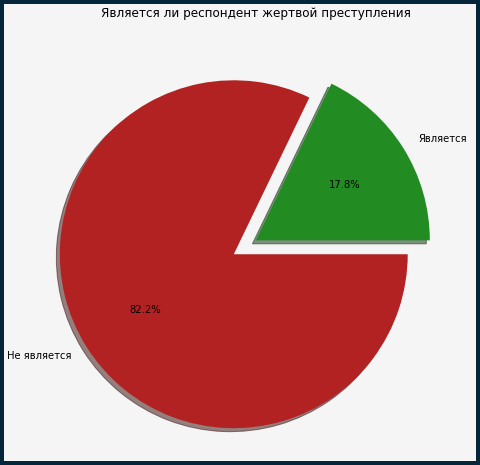

In [130]:
# Красивые графики
plt.figure(figsize=(12, 8), linewidth=8, edgecolor="#04253a").set_facecolor(digclr)
plt.pie(resp_is_victim_count.tolist(), labels=resp_is_victim_count.index,
        colors=('forestgreen', 'firebrick'), explode=(0, 0.15),
        shadow=True, autopct='%1.1f%%')

plt.title("Является ли респондент жертвой преступления")
plt.show()

**Вывод:**
> Почти каждый четвертый опрошенный является жертвой преступления

## Анализ влияния полового признака на совершение преступлений и подверженность им

Определим влияние полового признака на участие в криминальной сфере. Для этого найдем процентное отношение мужчин и женщин средих пострадавших и нападавших.

Создадим функцию для замены номера категории на её название

In [134]:
def ifmale(x):
  if x:
    return "Мужчина"
  else:
    return "Женщина"

Создадим необходимые выборки из датафрейма и определим, достаточны ли их размеры для последующего анализа

In [135]:
ifmale_offender = victims['offender_is_male'].dropna().apply(ifmale)
ifmale_resp = victims['resp_is_male'].dropna().apply(ifmale)

print("Выборка содержит", len(ifmale_offender), "строк")
print("Выборка содержит", len(ifmale_resp), "строк")

Выборка содержит 1467 строк
Выборка содержит 3001 строк


Посчитаем процентное содержание каждой категории в выборках

In [136]:
offender_count = ifmale_offender.value_counts(1)

print("Среди правонарушителей:")
for i in range(len(offender_count)):
  print("{} - {:.3f}%".format(offender_count.index[i],
                              offender_count[i] * 100))

victim_count = ifmale_resp.value_counts(1)

print("\nСреди пострадавших:")
for i in range(len(offender_count)):
  print("{} - {:.3f}%".format(victim_count.index[i],
                              victim_count[i] * 100))

Среди правонарушителей:
Мужчина - 78.391%
Женщина - 21.609%

Среди пострадавших:
Женщина - 53.915%
Мужчина - 46.085%


Затем построим по получившимся значениям график.

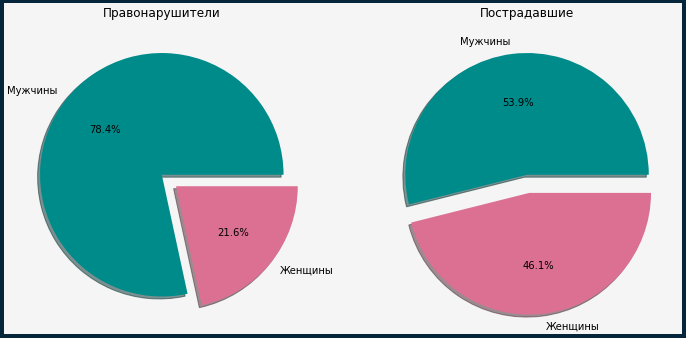

In [137]:
plt.figure(figsize=(12, 8), linewidth=8, edgecolor="#04253a") \
.set_facecolor(digclr)

ax = plt.subplot(1, 2, 1)
ax.set_title("Правонарушители")
ax.grid(which='major', color = 'gray', axis='y', linestyle=':')
ax.pie(offender_count,
       labels=["Мужчины", "Женщины"],
       colors=('darkcyan', 'palevioletred'),
       explode=(0, 0.15),
        shadow=True, autopct='%1.1f%%')

ax = plt.subplot(1, 2, 2)
ax.set_title("Пострадавшие")
ax.grid(which='major', color = 'gray', axis='y', linestyle=':')

ax.pie(victim_count,  labels=["Мужчины", "Женщины"],
       colors=('darkcyan', 'palevioletred'),
      explode=(0, 0.15),
        shadow=True, autopct='%1.1f%%')

plt.show()

**Вывод:**
> Исходя из случаев, когда правонарушитель известен: мужчины чаще замешаны в преступлениях (в качестве жертвы или правонарушителя).

> Исходя из случаев, когда правонарушитель известен: женщины являются преступникм лишь в четверти случаев правонарушения.

> Среди пострадавших процент мужчин и женщин отличается незначительно.



## Был ли найден нападавший?

Определим процентное отношение случаев, в которых был найден нападавший.

Создадим функцию для замены номера категории на её название

In [138]:
def off_found_group(x):
  if x == 1.0: return "Нарушитель найден"
  else: return "Нарушитель не найден"

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [139]:
offender_found = victims['victim_is_offender_found'].dropna() \
.apply(off_found_group)

print("Выборка содержит", len(offender_found), "строк")

Выборка содержит 3001 строк


In [140]:
offender_found_count = victims['victim_is_offender_found'].dropna() \
.apply(off_found_group).value_counts(1)

print("Был ли найден преступник?")
for i in range(len(offender_found_count)):
  print("{:<20} - {:.3f}%".format(offender_found_count.index[i],
                              offender_found_count[i] * 100))

Был ли найден преступник?
Нарушитель не найден - 73.775%
Нарушитель найден    - 26.225%


Построим по полученным значениям график.

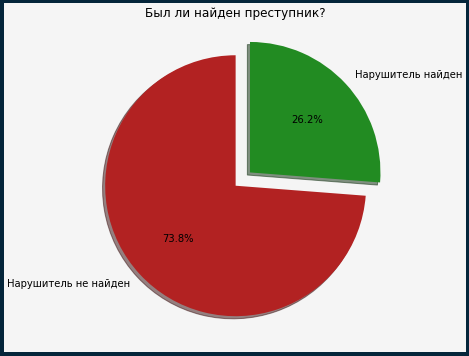

In [141]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(digclr)

plt.pie(offender_found_count.tolist(), labels=offender_found_count.index,
        colors=('firebrick', 'forestgreen'), explode=(0, 0.15),
        shadow=True, startangle=90, autopct='%1.1f%%')

plt.title('Был ли найден преступник?')
plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**
> По данным опроса, в трёх из четырёх случаев преступления правонарушитель остаётся не найденным.

## Была ли необходима медицинская помощь?

Определим процентное отношение пострадавших от физического насилия, которым впоследствии была необходима медицинская помощь.

Создадим функцию для замены номера категории на её название

In [142]:
def is_seeking_medical_help(x):
   if x == 1.0:
     return 'Нуждался в помощи'
   else:
     return 'Не нуждался в помощи'

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [143]:
med_help = victims['crime_is_seeking_medical_help'] \
                [victims['crime_is_violent_damage'] == 1.0] \
              .apply(is_seeking_medical_help)

print("Выборка содержит", len(med_help), "строк")

Выборка содержит 350 строк


Посчитаем процентное содержание каждой категории в выборке

In [144]:
med_help_perc = med_help.value_counts(1).sort_values()

print("Была ли необходима мед. помощь?:")
for i in range(len(med_help_perc)):
  print("{:<20} - {:.3f}%".format(med_help_perc.index[i],
                                  med_help_perc[i] * 100))

Была ли необходима мед. помощь?:
Нуждался в помощи    - 48.286%
Не нуждался в помощи - 51.714%


Построим по полученным значениям график.

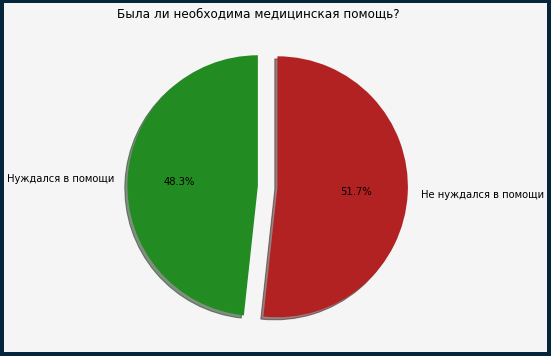

In [145]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(digclr)

plt.pie(med_help_perc, labels=med_help_perc.index,
        colors=('forestgreen', 'firebrick'), explode=(0, 0.15),
        shadow=True, startangle=90, autopct='%1.1f%%')

plt.title('Была ли необходима медицинская помощь?')
plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**
> Почти половине случаев физического насилия пострадавший от преступления нуждался в медицинской помощи.

## Был ли нападавший при исполнении?

Определим случаи, в которых нападавших был при исполнении. Также определим вид занятости, если преступник был при исполнении.

Создадим функцию для замены номера категории на её название

In [146]:
def offender_group(x):
  d = {1.0: 'Правоприменитель',
       2.0: 'Представитель власти', 
       3.0: 'Военный', 
       4.0: 'Сотрудник коммерческой организации', 
       5.0: 'Не при исполнении'}
  return d[x]

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [147]:
offender_on_duty = victims['offender_is_on_duty'] \
[victims['offender_is_on_duty'] != 6.0].dropna().apply(offender_group)

print("Выборка содержит", len(offender_on_duty), "строк")

Выборка содержит 1215 строк


Посчитаем процентное отношение категорий в выборке

In [148]:
offender_on_duty_group = offender_on_duty.value_counts(1).sort_values()
print("Был ли преступник при исполнении?:")
for i in range(len(offender_on_duty_group)):
  print("{:<35} - {:.3f}%".format(offender_on_duty_group.index[i],
                                  offender_on_duty_group[i] * 100))
  

Был ли преступник при исполнении?:
Военный                             - 0.658%
Представитель власти                - 2.551%
Правоприменитель                    - 3.951%
Сотрудник коммерческой организации  - 15.391%
Не при исполнении                   - 77.449%


Создадим две переменные, в первую поместим процентное соотношение видов занятости среди нападавших при исполнении, во вторую процентное соотношение нападавших при исполнении к нападавшим не при исполнении.

In [149]:
sum_type_duty = offender_on_duty[offender_on_duty != "Не при исполнении"]\
                                            .value_counts(1).sort_values()

sum_on_duty = [sum(offender_on_duty_group[:4]), offender_on_duty_group[4]]

print("Был ли преступник при исполнении?:")
print("При исполнении    - {:.3f}%\nНе при исполнении - {:.3f}%\n" \
      .format(sum_on_duty[0] * 100, sum_on_duty[1] * 100))

print("Соотношение видов занятости среди нападавших при исполнении:")
for i in range(len(sum_type_duty)):
  print("{:<35} - {:.3f}%".format(sum_type_duty.index[i],
                                  sum_type_duty[i] * 100))

Был ли преступник при исполнении?:
При исполнении    - 22.551%
Не при исполнении - 77.449%

Соотношение видов занятости среди нападавших при исполнении:
Военный                             - 2.920%
Представитель власти                - 11.314%
Правоприменитель                    - 17.518%
Сотрудник коммерческой организации  - 68.248%


Построим по полученным значениям график.

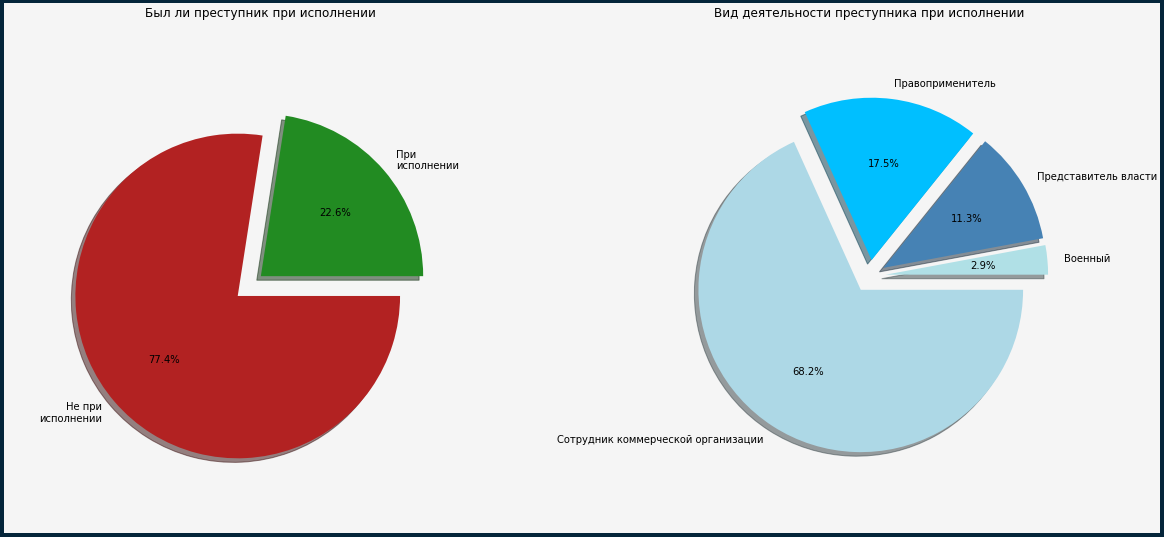

In [150]:
# Красивые графики
plt.figure(figsize=(20, 12), linewidth=8, edgecolor="#04253a") \
.set_facecolor(digclr)

ax = plt.subplot(1, 2, 1)
ax.set_title("Был ли преступник при исполнении")
ax.grid(which='major', color = 'gray', axis='y', linestyle=':')

ax.pie(sum_on_duty,
       labels=["При\nисполнении", "Не при\nисполнении"], radius=0.8,
       colors=('forestgreen', 'firebrick'), explode=(0, 0.15),
        shadow=True, autopct='%1.1f%%')

ax = plt.subplot(1, 2, 2)
ax.set_title("Вид деятельности преступника при исполнении")
ax.grid(which='major', color = 'gray', axis='y', linestyle=':')

ax.pie(sum_type_duty, labels=sum_type_duty.index,
       radius=0.8, colors=colors,
       explode=(0.08, 0.08, 0.08, 0.08),
       shadow=True, autopct='%1.1f%%')

plt.show()

**Вывод:**
> Более 20% злоумышленников находились при исполнении своих обязанностей

> Большая часть правонарушителей, находящихся при исполнении обязанностей, относится к категории сотрудников коммерчесих организаций

> Более 30% правонарушителей являются чиновниками (госслужащими), среди них большую часть преступлений совершают правоприменители (17.5%), меньшую – военные (2.9%), а представители власти, по данным опроса, занимают 11.3% от всех правонарушителей при исполнении.

## Анализ частоты видов преступлений

Определим процентное отношение частоты каждого преступления.

Создадим функцию для замены номера категории на её название

In [151]:
def crime_type_rename(x):
  dic = {1.0: 'Нападение', 
         2.0: 'Угрозы ', 
         3.0: 'Грабеж и разбой ', 
         4.0: 'Кража', 
         5.0: 'Мошенничество', 
         6.0: 'Мошенничество', 
         7.0: 'Прочее'}
  return dic[x]

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [152]:
crime_type = victims['crime_type'].drop(
    victims['crime_type'][victims['crime_type'] == 8.0].index) \
    .apply(crime_type_rename)

print("Выборка содержит", len(crime_type), "строк")

Выборка содержит 2422 строк


Посчитаем процентное отношение каждой категории в выборке

In [153]:
crime_type_perc = crime_type.value_counts(1)

print("Вид преступления:")
for i in range(len(crime_type_perc)):
  print("{:<16} - {:.3f}%".format(crime_type_perc.index[i],
                                  crime_type_perc[i] * 100))


Вид преступления:
Мошенничество    - 40.173%
Кража            - 25.021%
Грабеж и разбой  - 12.428%
Угрозы           - 8.629%
Нападение        - 8.051%
Прочее           - 5.698%


Построим по полученным значениям график

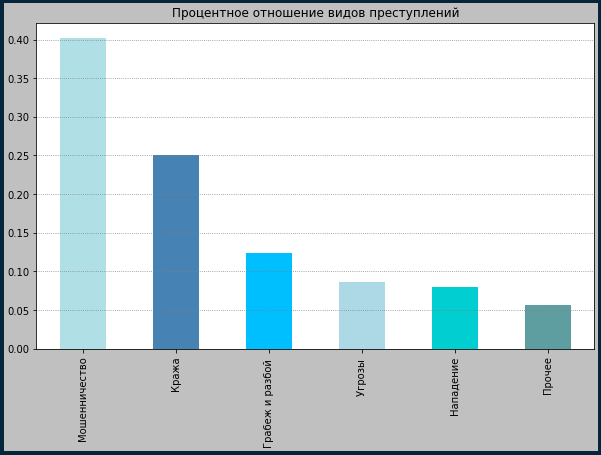

In [154]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(pltclr)

crime_type_perc.plot.bar(color=colors)
plt.title('Процентное отношение видов преступлений')
plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**
> Наиболее частый вид преступления по данным опроса – мошенничество (почти половина от всех преступлений)

> Кражи (тайные хищения) в 2 раза распространеннее грабежей и разбоев (насильственных хищений)

> Количество угроз незначительно больше количества нападений

> Прочие правонарушения занимают чуть более 5% от всех преступлений

> Таким образом, по данным опроса, мы можем сделать вывод, что преступления, подразумевающие использование физической силы, совершаются реже, чем преступления без насилия.

## Анализ влияния возраста на подверженность преступлениям

Определим зависимость возраста человека и подверженности преступлению. 

Создадим функцию для замены номера категории на её название

In [155]:
def age_group(x):
  if 18 <= x <= 24:
    return '18-24'
  elif 25 <= x <= 34:
    return '25-34'
  elif 35 <= x <= 44:
    return '35-44'
  elif 45 <= x <= 54:
    return '45-54'
  elif 55 <= x <= 64:
    return '55-64'
  elif x >= 65:
    return '65+'

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [156]:
resp_age = victims['resp_age'].apply(age_group)

print("Выборка содержит", len(resp_age), "строк")

Выборка содержит 3001 строк


Посчитаем процентное содержание каждой категории в выборке

In [157]:
group_resp_age = resp_age.value_counts(1).sort_index()

print("Среди пострадавших:")
for i in range(len(group_resp_age)):
  print("{:^5} лет - {:.3f}%".format(group_resp_age.index[i],
                                  group_resp_age[i] * 100))

Среди пострадавших:
18-24 лет - 11.096%
25-34 лет - 28.391%
35-44 лет - 21.593%
45-54 лет - 15.095%
55-64 лет - 13.462%
 65+  лет - 10.363%


Построим по полученным значениям график.

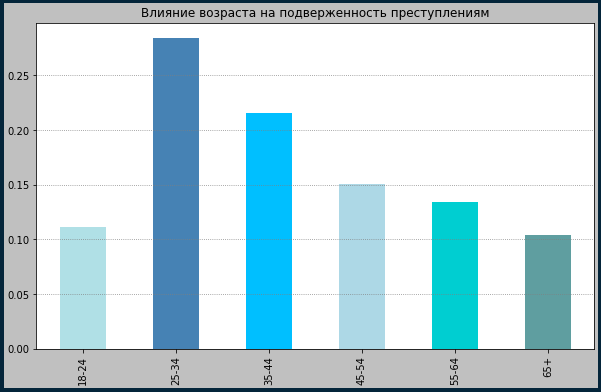

In [158]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(pltclr)
group_resp_age.plot.bar(color=colors)

plt.title('Влияние возраста на подверженность преступлениям')

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**
> Наименее подверженны преступлениям возрастные категории "18-24" и "65+".

> Наиболее подвержены преступлениям лица 25-34 лет, далее процент жертв плавно уменьшается

Попробуем найти зависимость типа преступления от возраста. Для этого создадим выборки по каждой возрастной категории и посчитаем процент каждого вида преступлений среди полученных выборок

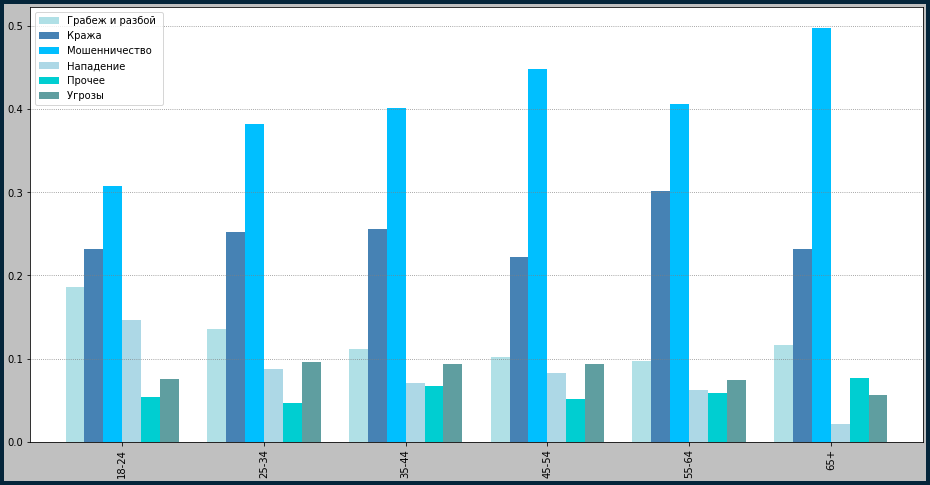

In [159]:
victims['resp_age_group'] = victims['resp_age'].apply(age_group)

crime_age = pd.concat([victims['crime_type'].drop(victims['crime_type']
                        [victims['crime_type'] == 8.0].index),
                        victims['resp_age_group']], axis=1).dropna()

age_lst = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

s = []
for i in age_lst:
  s.append(crime_age['crime_type'][crime_age['resp_age_group'] == i] \
     .apply(crime_type_rename).value_counts(1).sort_index())

fp = pd.DataFrame(s,
              index=age_lst,
              columns=s[0].index)

fig, ax = plt.subplots(linewidth=8, edgecolor="#04253a")

ax.set_facecolor('white')
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure
fig.set_facecolor(pltclr)

fp.plot.bar(color=colors, ax=ax, width=0.8)

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

plt.show()


**Вывод:**


> Пожилые люди чаще других становятся жертвами мошенничества, в то время как молодые – реже всего. Вероятно, это связанно с совершенствованием и цифровизацией методов мошенничества, что подвергает лиц, не обладающих достаточной цифровой грамостностью, наибольшим рискам со стороны мошенников.

> Молодые люди чаще остальных становятся жертвами грабежей и разбоев, далее процент плавно уменьшается и слегка возрастает у лиц возраста "65+".

> Наиболее подвержены кражам лица категории "55-64", остальные категории по процентному отношению отличаются незначительно.

> Наименее подвержены угрозам возрастные группы "18-24" и "65+", остальные категории по процентному отношению отличаются незначительно.

> Жертвами краж чаще всего становятся люди возрастной категории "55-64". Возможно, это связанно с тем, что люди к данному периоду жизни успевают уже материально обеспеченны и имеют накопления к выходу на пенсию, чем вызывают интерес преступников.

> Прочим преступлениям больше всего подвержены пенсионеры.





## Анализ влияния дохода на подверженность преступлениям

Для начала найдем процентное отношение каждого вида дохода среди пострадавших.

Создадим функцию для замены номера категории на её название

In [160]:
def income(x):
  d = {1.0: "Бедность",
       2.0: "Низкий",
       3.0: "Средний",
       4.0: "Высокий",
       5.0: "Очень высокий"}
  return d[x]

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [161]:
resp_income = victims['resp_income'].dropna() \
                    .sort_values().apply(income)

print("Выборка содержит", len(resp_income), "строк")

Выборка содержит 2910 строк


Посчитаем процентное содержание каждой категории в выборке

In [162]:
group_resp_income = resp_income.value_counts(1). \
                    reindex(resp_income.unique())

print("Среди пострадавших:")
for i in range(len(group_resp_income)):
  print("{:<13} - {:.3f}%".format(group_resp_income.index[i],
                                  group_resp_income[i] * 100))


Среди пострадавших:
Бедность      - 10.103%
Низкий        - 27.491%
Средний       - 35.739%
Высокий       - 18.969%
Очень высокий - 7.698%


Построим по полученным значениям график.

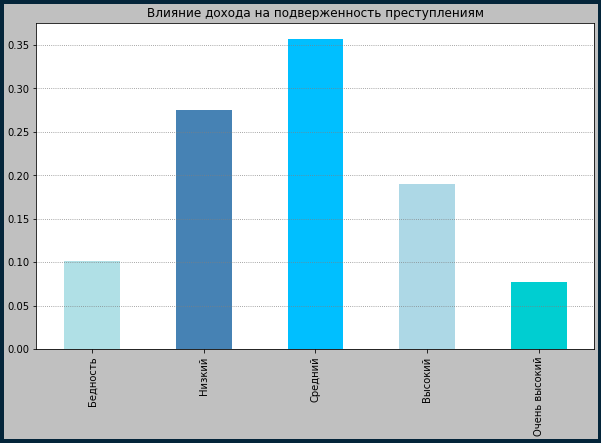

In [163]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(pltclr)

group_resp_income.plot.bar(color=colors)

plt.title('Влияние дохода на подверженность преступлениям')

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод**:


> Распределение процентного отношения подверженности преступлениям среди разных уровней дохода близко к нормальному распределению.

> Логично предположить, что бедные менее подвержены преступлениям из-за отсутствия материальных средств и имущества, а люди с очень высоким уровнем дохода – в силу того, что их уровень достатка позволяет позаботится о безопасности своих ценностей.


Определим зависимость между уровнем дохода и типом преступления. Для этого создадим выборки по каждому уровню дохода и найдем процентное соотношение видов преступлений среди полученных выборок

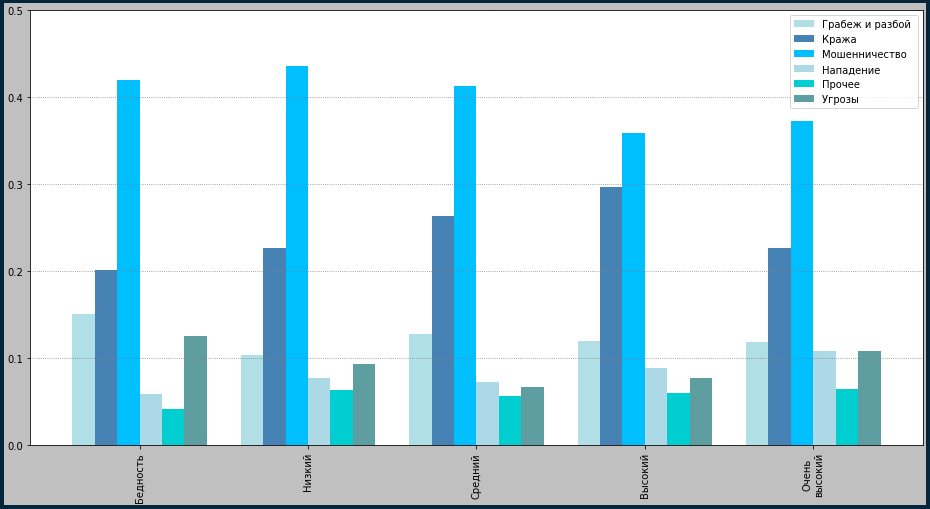

In [164]:
#Графики процента вида преступления для каждого уровня доходов

crime_income = pd.concat([victims['crime_type'].drop(victims['crime_type']
                        [victims['crime_type'] == 8.0].index),
                        victims['resp_income']], axis=1).dropna()

s = []
for i in range(1, 6):
  s.append(crime_income[crime_income['resp_income'] == i]['crime_type']
           .apply(crime_type_rename).value_counts(1).sort_index())
  
crime_type_lst = ["Бедность", "Низкий", "Средний", "Высокий", "Очень\nвысокий"]

fp = pd.DataFrame(s,
              index=crime_type_lst,
              columns=s[0].index)

fig, ax = plt.subplots(linewidth=8, edgecolor="#04253a")

ax.set_facecolor('white')
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure
fig.set_facecolor(pltclr)

fp.plot.bar(color=colors, ax=ax, width=0.8)

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

plt.ylim(top=0.5)

plt.show()

**Вывод:**

> Среди всех уровней дохода наиболее распространённым видом преступления является мошенничество. Наиболее подвержены люди с низкими и очень низкими доходами.

> Бедные больше других подвержены грабежам и разбоям, угрозам, но меньше всех – нападениям и прочим видам преступлений.

> Люди с очень высоким уровнем дохода часто становятся жертвами угроз, нападений, грабежей и разбоев, что связанно с повышенной заинтересованностью преступников в заполучении чужих материальных ценностей.

> Высокий класс больше других подвержен кражам.



##Анализ влияния образования на подверженность преступлениям


Для начала найдем процентное отношение каждого вида образования среди пострадавших.

Создадим функцию для замены номера категории на её название

In [165]:
def resp_edu_group(x):
  d = {1: "Полное среднее и ниже",
       2: "Среднее спец-ное/техническое\nили нач-ное профес-ное",
       3: "Высшее и незаконченное высшее"}
  return d[x]

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [166]:
resp_edu = victims["resp_edu"].dropna().sort_values() \
                              .apply(resp_edu_group)

print("Выборка содержит", len(resp_edu), "строк")

Выборка содержит 3001 строк


Посчитаем процентное содержание каждой категории в выборке

In [167]:
group_resp_edu = resp_edu.value_counts(1). \
                    reindex(resp_edu.unique())

print("Среди пострадавших:")
for i in range(len(group_resp_edu)):
  print("{:<13} - {:.3f}%".format(group_resp_edu.index[i],
                                  group_resp_edu[i] * 100))

Среди пострадавших:
Полное среднее и ниже - 18.094%
Среднее спец-ное/техническое
или нач-ное профес-ное - 35.322%
Высшее и незаконченное высшее - 46.584%


Построим по полученным значениям график.

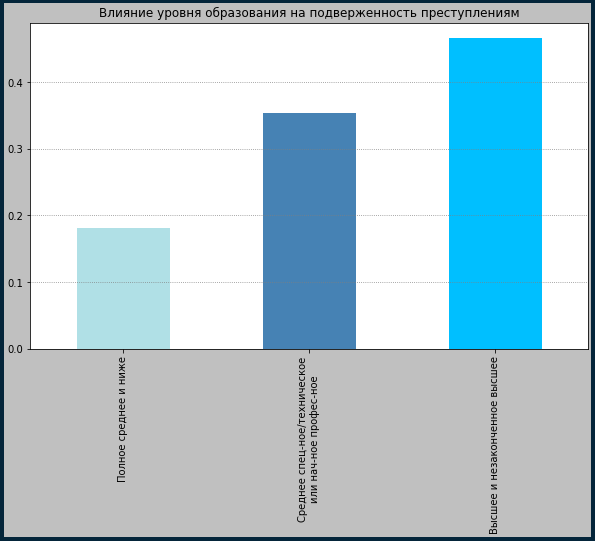

In [168]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(pltclr)

group_resp_edu.plot.bar(color=colors)

plt.title('Влияние уровня образования на подверженность преступлениям')

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**

> Почти половина пострадавших респондентов имеет высшее или незаконченное высшее образование

> Чуть больше трети пострадавших респондентов имеет среднее спец-ное/техническое или нач-ное профес-ное образование

> Менее четверти пострадавших респондентов имеет полное среднее образование и ниже

*Данное распределение объясняется тем, что люди категории 18-24 имеют более низкий уровень образования и менее подвержены преступлениям, чем люди более старших возрастов, которые соответственно имеют более высокий уровень образования*

Определим зависимость между образования и типом преступления. Для этого создадим выборки по каждому виду образования и найдем процентное соотношение видов преступлений среди полученных выборок

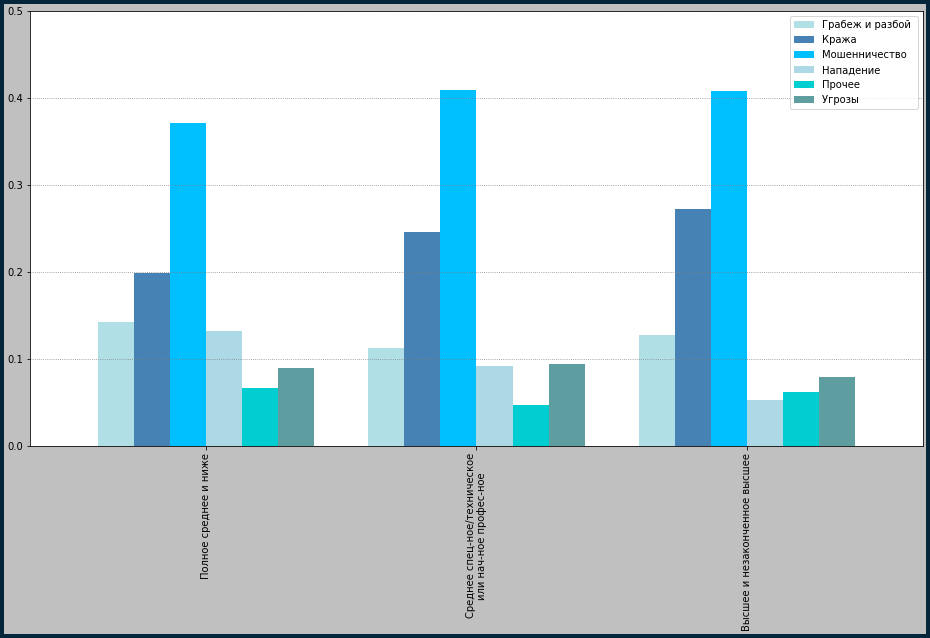

In [169]:
#Графики процента вида преступления для каждого уровня доходов

crime_edu = pd.concat([victims['crime_type'].drop(victims['crime_type']
                        [victims['crime_type'] == 8.0].index),
                        victims['resp_edu']], axis=1).dropna()

s = []
for i in range(1, 4):
  s.append(crime_edu[crime_edu['resp_edu'] == i]['crime_type']
           .apply(crime_type_rename).value_counts(1).sort_index())
  
edu_lst = ["Полное среднее и ниже",
           "Среднее спец-ное/техническое\nили нач-ное профес-ное",
           "Высшее и незаконченное высшее"]

fp = pd.DataFrame(s,
              index=edu_lst,
              columns=s[0].index)

fig, ax = plt.subplots(linewidth=8, edgecolor="#04253a")

ax.set_facecolor('white')
fig.set_figwidth(16)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure
fig.set_facecolor(pltclr)

fp.plot.bar(color=colors, ax=ax, width=0.8)

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

plt.ylim(top=0.5)

plt.show()

**Вывод:**

> По мере роста уровня образования респондентов растет уровень краж, что, возможно, связано с тем, что более высокообразованные люди имеют более высокооплачиваемую работу и, следовательно, обладают материальными благами, что делает их более вероятными жертвами покушений на кражи.

> По мере роста уровня образования респондентов падает количество совершаемых в их сторону нападений.

> Уровни остальных преступлений не имеют прямых зависимостей от уровня образования опрошенного.


## Анализ скорости реагирования правоохранителей



Определим скорость реагирования правоохранительных органов на преступления.

Создадим функцию для замены номера категории на её название

In [170]:
def reaction_time_group(x):
  d = {1.0: "Менее чем 30 минут",
       2.0: "Менее чем 1 час",
       3.0: "Менее чем 3 часа",
       4.0: "Менее чем 6 часов",
       5.0: "Менее чем 12 часов",
       6.0: "Не приехали"}
  return d[x]

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [171]:
police_react = victims['victim_police_reaction_time'] \
              .dropna().sort_values().drop(
              victims['victim_police_reaction_time']
              [victims['victim_police_reaction_time'] == 7.0].index) \
              .apply(reaction_time_group)

print("Выборка содержит", len(police_react), "строк")

Выборка содержит 422 строк


Посчитаем процентное содержание каждой категории в выборке

In [172]:
group_police_reaction = police_react.value_counts(1) \
                        .reindex(police_react.unique())

print("Полиция среагировала:")
for i in range(len(group_police_reaction)):
  print("{:<18} - {:.3f}%".format(group_police_reaction.index[i],
                                  group_police_reaction[i] * 100))


Полиция среагировала:
Менее чем 30 минут - 50.000%
Менее чем 1 час    - 25.592%
Менее чем 3 часа   - 10.427%
Менее чем 6 часов  - 1.659%
Менее чем 12 часов - 2.844%
Не приехали        - 9.479%


Построим по полученным значениям график.


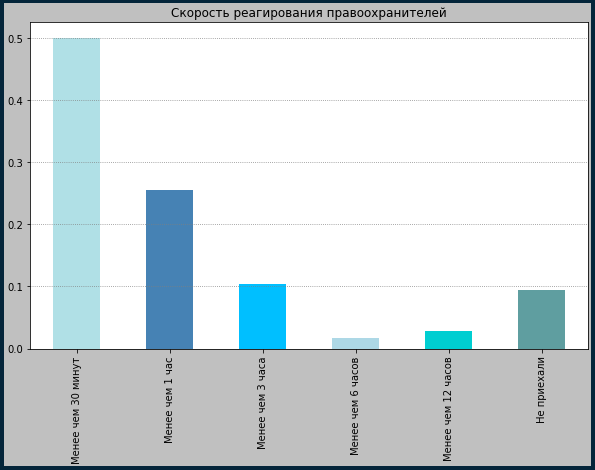

In [173]:
# Красивые графики
plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(pltclr)

group_police_reaction.plot.bar(color=colors)

plt.title('Скорость реагирования правоохранителей')

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**
> В половине случаев правоохранители реагируют на вызов с должной скоростью (меньше 30 минут)

> В четверти случаев полицейские приезжают менее чем за час.

> В 10% случаев полицейские приезжают в течение трех часов.

> Почти в каждом десятом случае полицейские не приезжают по вызову

## Анализ материального ущерба пострадавших

Проанализируем материальный ущерб пострадавшим, определим медианное и среднее значение материального ущерба.

Создадим выборку, содержащую материальный ущерб жертв преступлений и посчитаем её размер

In [219]:
damage_rub = victims['victim_damage_rub'] \
            [victims['victim_damage_rub'] != 0].dropna() 

damage_rub.rename("damage")

0           300.0
1         80000.0
2          3000.0
3          7000.0
5          2000.0
           ...   
16778     10000.0
16788      1000.0
16803     12000.0
16807    124000.0
16814      1500.0
Name: damage, Length: 2007, dtype: float64

Теперь посчитаем средний и медианный материальные ущербы

In [216]:
damage_median = damage_rub.median()

damage_mean = damage_rub.mean()

print("Медиана материального ушерба - {} рублей"
        .format(int(damage_median)))

print("Среднее материального ушерба - {} рублей"
        .format(int(damage_mean)))

Медиана материального ушерба - 12000 рублей
Среднее материального ушерба - 3116267 рублей


Мы можем заметить что среднее значение значительно отличается от медианного, возможно это происходит из-за выбросов в данных. Попробуем их удалить.

Для этого сначала определим вид распределения.

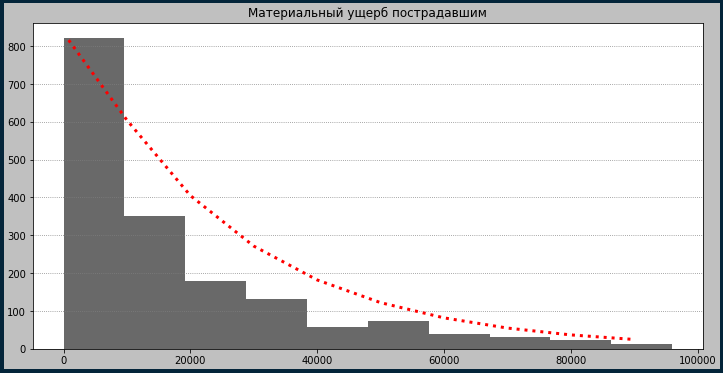

In [176]:
def exp(x):
    return 1.4 * 644 * math.e ** (-0.4 * (x / 10000))


X = [i for i in range(10000, 100000, 10000)]

Y_ideal = [exp(2500)] + [exp(i) for i in X]

plt.figure(figsize=(12, 6), linewidth=8, edgecolor="#04253a") \
.set_facecolor(pltclr)

plt.hist(damage_rub[damage_rub < 100000], color='dimgray')
plt.plot([exp(2500)] + X, Y_ideal, color="red", linewidth=3, linestyle=':')

plt.title('Материальный ущерб пострадавшим')
plt.grid(which='major', color = 'gray', axis='y', linestyle=':') # boxplot

Исходя из графика видно, что распределение является ненормальным, а именно на графике представлено экспоненциальное распределение.

Для определения выбросов было решено использовать межквартильный размах.

In [177]:
q25, q75 = np.percentile(damage_rub, [75, 25])
iqr = np.subtract(q25, q75)

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print("Верхняя граница равна", upper)

Верхняя граница равна 57750.0


Теперь удалим все значения превышающие верхнюю границу.

In [178]:
print("До исключения выбросов выборка содержит", len(damage_rub), "строк")

damage_rub = damage_rub[damage_rub <= upper]

print("После исключения выбросов выборка содержит", len(damage_rub), "строк")

До исключения выбросов выборка содержит 2007 строк
После исключения выбросов выборка содержит 1611 строк


Построим "ящик с усами".

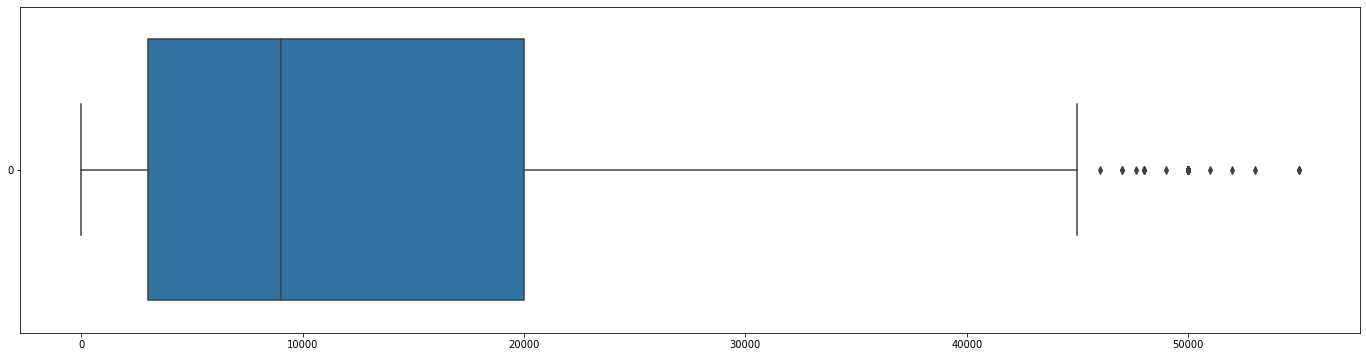

In [179]:
fig, ax = plt.subplots(figsize=(24, 6))
sns.boxplot(data=damage_rub, orient="h", ax=ax)

Как мы видим, большинство выбросов были удалены.

Повторим вычисления среднего и медианы

In [180]:
damage_median_new = damage_rub.median()

damage_mean_new = damage_rub.mean()

print("Медиана материального ушерба после исключения выбросов - {} рублей"
        .format(int(damage_median_new)))

print("Среднее материального ушерба после исключения выбросов - {} рублей"
        .format(int(damage_mean_new)))

Медиана материального ушерба после исключения выбросов - 9000 рублей
Среднее материального ушерба после исключения выбросов - 13243 рублей


**Вывод:**
> Существуют случаи, когда ущерб в результате преступления значительно превышает ущерб в большинстве других случаев. Из-за значительного влияния на среднее и медианное значение, данные случаи были исключены.

> Медианный материальный ущерб после исключения выбросов данных, полученный пострадавшими в результате преступления, составляет 7 000 рублей.

> Средний материальный ущерб после исключения выбросов данных, полученный пострадавшими в результате преступления, составляет 9 818 рублей.

## Анализ зависимости вида преступлений от времени суток

Определим процентную зависимость количества совершаемых преступлений от времени суток.

Создадим функцию для замены номера категории на её название

In [181]:
def if_day(x):
  if x == 1.0:
    return 'День'
  else:
    return 'Ночь'

Создадим необходимую выборку из датафрейма и определим, достаточен ли ее размер для последующего анализа

In [182]:
victims_time = victims['crime_is_daytime'].dropna() \
.apply(if_day)

print("Выборка содержит", len(victims_time), "строк")

Выборка содержит 3001 строк


Посчитаем процентное содержание каждой категории в выборке

In [183]:
victims_time_count = victims_time.value_counts(1)

print("Время суток в момент совершения преступления:")
for i in range(len(victims_time_count)):
  print("{} - {:.3f}%".format(victims_time_count.index[i],
                                  victims_time_count[i] * 100))

Время суток в момент совершения преступления:
День - 65.178%
Ночь - 34.822%


Построим по полученным значениям график.

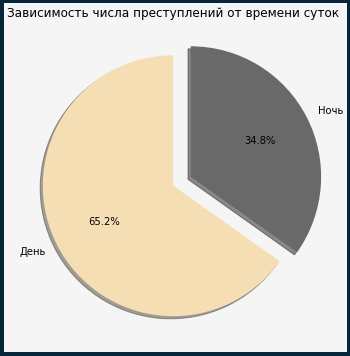

In [184]:
#Красивые графики
ax = plt.figure(figsize=(10, 6), linewidth=8, edgecolor="#04253a")
ax.set_facecolor(digclr)


plt.pie(victims_time_count, labels=victims_time_count.index, colors=('wheat','dimgray'),
        explode=(0, 0.15), shadow=True, startangle=90, autopct='%1.1f%%')

plt.title('Зависимость числа преступлений от времени суток')

plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

**Вывод:**
> Большая часть преступлений совершается в дневное время суток.

Затем попробуем найти зависимость между определенным видом преступления и временем суток. Для этого создадим выборки по каждому виду преступлений и посчитаем процентное соотношение преступлений ночью и преступлений днем

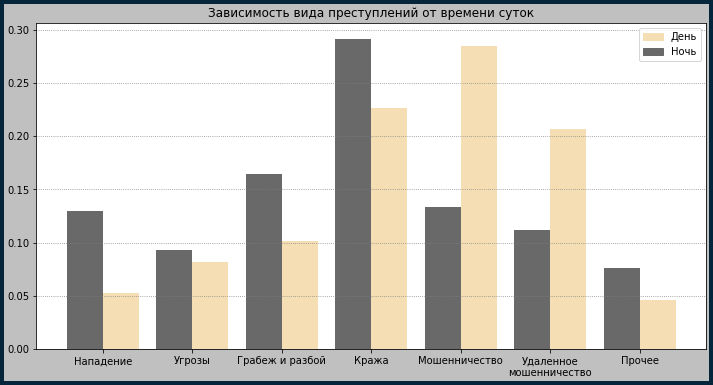

In [185]:
crimes = victims['crime_type'][victims['crime_type'] != 8.0]

daytime_crime = crimes[victims['crime_is_daytime'] == 1.0] \
.value_counts(1).sort_index().tolist()

nighttime_crime = crimes[victims['crime_is_daytime'] == 0.0] \
.value_counts(1).sort_index().tolist()

# Красивые графики
tick_names = ['Нападение',
              'Угрозы',
              'Грабеж и разбой',
              'Кража',
              'Мошенничество',
              'Удаленное\nмошенничество',
              'Прочее'] 

fig, ax = plt.subplots(linewidth=8, edgecolor="#04253a")

ax.bar(tick_names, daytime_crime, align='edge',
       width=0.4, color='wheat')
ax.bar(tick_names, nighttime_crime, align='edge',
       width=-0.4, color='dimgray')
plt.grid(which='major', color = 'gray', axis='y', linestyle=':')

plt.title('Зависимость вида преступлений от времени суток')

day_patch = mpatches.Patch(color='wheat', label='День')
night_patch = mpatches.Patch(color='dimgray', label='Ночь')
ax.legend(handles=[day_patch, night_patch])

ax.set_facecolor('white')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor(pltclr)

**Вывод:**
> Наиболее серьезные преступления, такие как нападения, угрозы, грабежи и разбои, кражи, совершаются в большинстве случаев в тёмное время суток

> Преступления, связанные с мошенничеством и удаленным мошенничеством, чаще всего совершаются днём

> Таким образом, несмотря на то, что большинство преступлений осуществляется днём, наиболее тяжкие из них осуществляются ночью. Процент дневных преступлений больше, поскольку значительная часть от них занимает мошенничество, осуществляемое в большинстве случаев в светлое время суток.

# Классификационная модель
##### Исходя из полученных нами данных в результате исследования зависимости влияния социально-демографических характеристик человека на его подверженность преступлению, было принято решение построить классификационную модель, предсказывающую вероятность стать жертвой преступления (целевой признак – **resp_is_crime_victim**) исходя из 4 категориальных признаков:
*   **resp_is_male** – пол жертвы преступления
*   **resp_age** – возрастная категория, к которой относится респондент
*   **resp_edu** – уровень образования респондента
*   **resp_incom** – уровеень дохода опрошенного

Для этого была выбрана библиотека **CatBoost** – открытая программная библиотека, разработанная компанией **Яндекс** и реализующая уникальный патентованный алгоритм построения моделей машинного обучения, использующий одну из оригинальных схем градиентного бустинга, включающая в себя классификационную модель **CatBoostClassifier**.



In [186]:
from sklearn.model_selection import train_test_split

forcatbst = df[["resp_is_male", "resp_age", "resp_edu", "resp_income","resp_is_crime_victim"]]

train_cat, test_cat = train_test_split(forcatbst, train_size=0.75, random_state=42)

train_cat.fillna(-999, inplace=True)
test_cat.fillna(-999, inplace=True)

In [187]:
X = train_cat.drop("resp_is_crime_victim", axis=1)
y = train_cat.resp_is_crime_victim

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

X_test = test_cat

In [189]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [190]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    eval_metric='Accuracy',
    random_seed=69,
    logging_level='Silent',
    use_best_model=True,
    iterations=202,
    boosting_type='Ordered'
)

In [191]:
model = model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [192]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [193]:
validation_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)
eval_metrics = model.eval_metrics(validation_pool, ['Accuracy'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [194]:
print('Precise validation accuracy score: {:.3f}%'.format(np.max(cv_data['test-Accuracy-mean']) * 100))

Precise validation accuracy score: 82.407%
